# Semantic Segmentation

## 1. Introduction


This is a brief overview about **Deep Learning** image segmentation model using **Tensorflow Keras** and architectures like **U-Net and UNet++**.

Semantic segmentation is one of the main problems in the field of Computer Vision, which needs to deal with the understanding of the scene. Its importance is highlighted by the fact that an increasing number of applications nourish from inferring knowledge from imagery, like self-driving vehicles, human-computer interaction, virtual reality etc.

## 2. What is Semantic Segmentation?

There are various levels of granularity in which the computers can gain an understanding of images. For each of these levels there is a problem defined in the Computer Vision domain, like: 1) image classification; 2) classification with localization; 3) object detection; 4) semantic segmentation and 5) instance segmentation.

Thus, semantic segmentation is a natural step in the progression from coarse to fine inference. First, classification consists of making a prediction for a whole input. The next step is localization / detection, which provide not only the classes but also additional information regarding the spatial location of those classes. Finally, semantic segmentation achieves fine-grained inference by making dense predictions inferring labels for every pixel.

Therefore, the goal of semantic image segmentation is to label **each pixel** of an image with a corresponding **class** of what is being represented.

Unlike other Computer Vision problems, whose outputs are labels and bounding box parameters, semantic segmentation's output is a high resolution image (typically of the same size as input image) in which each pixel is classified to a particular class. Thus it is a pixel level image classification.

<figure>
    <img src="https://miro.medium.com/max/700/1*nXlx7s4wQhVgVId8qkkMMA.png" alt="Semantic Segmentation Image" >
    <figcaption>Semantic Segmentation. Source: https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47</figcaption>
</figure>

Another segmentation case is called instance segmentation wherein along with pixel level classification, we expect the computer to classify each instance of a class separately, giving a unique label to every instance of a particular object in the image.

<figure>
    <img src="https://www.researchgate.net/profile/Dae-Young-Kang/publication/346091812/figure/fig5/AS:979480482955270@1610537753983/Computer-vision-tasks-Adapted-from.png" alt="Computer Vision Tasks" >
    <figcaption>Computer Vision Tasks. Source: https://www.researchgate.net/figure/Computer-vision-tasks-Adapted-from_fig5_346091812</figcaption>
</figure>


## 3. Representing the task



Simply, semantic segmentation goal is to take either a RGB color image (height×width×3) or a grayscale image (height×width×1) and output a segmentation map where each pixel contains a class label represented as an integer (height×width×1).

<figure>
    <img src="https://www.jeremyjordan.me/content/images/2018/05/Screen-Shot-2018-05-17-at-9.02.15-PM.png" alt="Semantic Labels" >
    <figcaption>Semantic Labels. Source: https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47</figcaption>
</figure>

Similar to how we treat standard categorical values, we'll create our target by **one-hot encoding** the class labels - essentially creating an output channel for each of the possible classes. A prediction can be collapsed into a segmentation map by taking the **argmax** of each depth-wise pixel vector. We can easily inspect a target by overlaying it onto the observation.

When we overlay a single channel of our target (or prediction), we refer to this as a mask which illuminates the regions of an image where a specific class is present.

<figure>
    <img src="https://www.jeremyjordan.me/content/images/2018/05/Screen-Shot-2018-05-16-at-9.36.00-PM.png" alt="One-hot encoding" >
    <figcaption>One-hot encoding. Source: https://www.jeremyjordan.me/semantic-segmentation/</figcaption>
</figure>

<figure>
    <img src="https://www.jeremyjordan.me/content/images/2018/05/Screen-Shot-2018-05-16-at-9.36.38-PM.png" alt="Semantic Mask" >
    <figcaption>Semantic Mask. Source: https://www.jeremyjordan.me/semantic-segmentation/</figcaption>
</figure>

## 4. Dataset

####**4.1 Semantic segmentation of aerial imagery**

Humans in the Loop is publishing an open access dataset annotated for a joint project with the Mohammed Bin Rashid Space Center in Dubai, the UAE.

The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 8 larger tiles. The classes are:
Building, Land (unpaved area), Road, Vegetation, Water, Unlabeled.

**Acknowledgements**\
The images were segmented by the trainees of the Roia Foundation in Syria.

**Source:** https://www.kaggle.com/humansintheloop/semantic-segmentation-of-aerial-imagery


In [ ]:
# Downloading the dataset and unzipping it.
# Total of 72 image files (8 folders, containing 9 files each)

!wget https://github.com/aislanacf/Dataset/raw/main/ExerciseDataset.zip
!unzip ExerciseDataset.zip

--2023-06-12 22:35:26--  https://github.com/aislanacf/Dataset/raw/main/ExerciseDataset.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aislanacf/Dataset/main/ExerciseDataset.zip [following]
--2023-06-12 22:35:26--  https://raw.githubusercontent.com/aislanacf/Dataset/main/ExerciseDataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30986909 (30M) [application/zip]
Saving to: ‘ExerciseDataset.zip’

ExerciseDataset.zip 100%[===================>]  29.55M  --.-KB/s    in 0.1s    

2023-06-12 22:35:28 (291 MB/s) - ‘ExerciseDataset.zip’ saved [30986909/30986909]

Archive:  ExerciseDataset.zi

In [ ]:
# Listing the contents of the virtual machine.

!ls -l


total 30272
drwxr-xr-x 10 root root     4096 Mar 17  2021 ExerciseDataset
-rw-r--r--  1 root root 30986909 Jun 12 22:35 ExerciseDataset.zip
drwxr-xr-x  1 root root     4096 Jun  9 13:39 sample_data


In [ ]:
from google.colab import drive

# mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# adjust the path to the location where the models will be written / read
root_path = '/content/drive/My Drive/Colab Notebooks/'


Mounted at /content/drive


#### 4.2 Data Loader

The dataset is divided into 8 folders corresponding to the original TILES. The storage structure is:

ExerciseDataset/Tile?/images = contains JPG images, from 001 to 009.\
ExerciseDataset/Tile?/masks  = contains PNG masks, from 001 to 009.

The character "?" corresponds to the TILE number (folder), ranging from 1 to 8.

Total of 72 image files (8 folders, containing 9 files each).

In [ ]:
# The COLAB virtual machine already has several packages installed.
# Therefore, it is only necessary to load into memory those that will be used.

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [ ]:
# Defining some variables to access the image files

dataset_path = "/content/ExerciseDataset/"

# Creating folder name list for training
train_folders = sorted([entry for entry in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, entry))])

# As the set of images is small, tiles 2, 4 and 6 folders will be used to evaluate the models.
evaluate_folders = []
evaluate_folders.append(train_folders.pop(1))

print(train_folders)
print(evaluate_folders)

['Tile1', 'Tile3', 'Tile4', 'Tile5', 'Tile6', 'Tile7', 'Tile8']
['Tile2']


##### 4.2.1 Function to read image pairs (sample and label)

In [ ]:
# Function to read images

def loadImages(datasetPath, folders, normalize=False):
    images = []
    masks = []

    for folder in folders:
        path = os.path.join(datasetPath,folder)

        for entry in sorted(os.listdir(os.path.join(path,'images'))):
            filename = entry[0:-4]

            # OpenCV returns channels in BGR order. Convert to RGB. Only, in this dataset images are organized as BGR
            #img = cv2.cvtColor(cv2.imread(os.path.join(path,'images', filename + '.jpg')), cv2.COLOR_BGR2RGB)
            img = cv2.imread(os.path.join(path,'images', filename + '.jpg'))

            # Masks are png files with 3 channels (with same values): convert to single channel
            mask = cv2.cvtColor(cv2.imread(os.path.join(path,'masks', filename + '.png')), cv2.COLOR_BGR2GRAY)

            if img is not None and mask is not None:
                if normalize:
                    img = img / 255.

                images.append(img)
                masks.append(mask)

    return images, masks

##### 4.2.2 Loading images to memory

In [ ]:
# Loading all existing images in Dataset (training) Folders

all_images, all_masks = loadImages(dataset_path, train_folders, True)

print( "Number of images (X): %d " % ( len(all_images) ) )
print( "Number of masks/references (Y): %d " % ( len(all_masks) ) )

Number of images (X): 63 
Number of masks/references (Y): 63 


#### 4.3 Extracting Image Patches

The images have large and different spatial dimensions (width and height). That is, they are not uniform.

Therefore, it was necessary to extract PATCHES (cutouts from the original image) to reduce and standardize the dimension
of the images that will be used as INPUT of the training.

In [ ]:
'''
PATCH_SIZE defines the measures (spatial dimensions) of the patch.
Working with square patches (H = W). Therefore, a scalar variable is enough.
'''
patch_size = 256

'''
STRIDE will determine the position of the next patch.
A stride smaller than the spatial dimension of the patch determines an overlapping.
12.5% ​​overlap between patches.
'''
stride = patch_size - (patch_size // 8)

# Working with 3 channel images
channels = 3

# Network's input shape
input_shape = (patch_size, patch_size, channels)


##### 4.3.1 Function to extract patches

In [ ]:
# Function: extract_patches_from_list
# -----------------------------------
# Extract patches from a list of images (original and reference)
#
# Input parameters:
#   images = list containing arrays of the original images (h, w, c)
#   references = list containing arrays of reference images (h, w, c)
#   patch_size = patch size (scalar). The shape of the patch is square.
#   stride = displacement to be applied.
#
# Returns:
#   A, B = Numpy arrays containing the patches for the original image (A) and respective reference (B).

def extract_patches_from_list(images, references, patch_size, stride):
    patch_img = []
    patch_ref = []

    for i in range(0, len(images)):
        xTemp, yTemp = extract_patches(images[i], references[i], patch_size, stride)

        patch_img += xTemp
        patch_ref += yTemp

    return np.array(patch_img), np.array(patch_ref)


# Function: extract_patches
# -------------------------
# Extract patches from the original and reference image
#
# Input parameters:
#   image      = array containing the original image (h,w,c)
#   reference  = array containing the reference image (h,w,c)
#   patch_size = patch size (scalar). The shape of the patch is square.
#   stride     = displacement to be applied.
#
# Returns:
#   A, B = List containing the patches for the original image (A) and Reference (B).
#
def extract_patches(image, reference, patch_size, stride):
    #print(image.shape)

    patch_img = []
    patch_ref = []

    h = image.shape[0] // stride
    w = image.shape[1] // stride

    for m in range(0, h):
        for n in range(0, w):
            #print('M %d, N %d, start %d finish %d , start %d finish %d' % (m, n, m*stride , m*stride+patch_size, n*stride, n*stride+patch_size) )
            if ( (m*stride+patch_size <= image.shape[0]) and (n*stride+patch_size <= image.shape[1]) ): # only if it fits inside the image
                patch_img.append( image[m*stride:m*stride+patch_size,n*stride:n*stride+patch_size,:] )
                patch_ref.append( reference[m*stride:m*stride+patch_size,n*stride:n*stride+patch_size] )

    return patch_img, patch_ref

##### 4.3.2 Extracting training patches

In [ ]:
# Extract training patches
x_patches, y_patches = extract_patches_from_list( all_images, all_masks, patch_size, stride)

print( "Total patches: %d of shapes %s " % ( x_patches.shape[0], x_patches.shape[1:] ) )

Total patches: 1476 of shapes (256, 256, 3) 


#### 4.4 Class Dictionary

In [ ]:
# Class dictionary: for the convertion of gray values into class labels, and class labels into RGB values (for visualization)

number_of_classes = 6
classes = { "length": number_of_classes,
            "annotations": [
                { "id": 1, "name": "Land (unpaved area)", "gray": 92, "rgb": (132, 41, 246), "rgb_new": (155, 155, 155), "hex": "8429F6" },
                { "id": 2, "name": "Road", "gray": 172, "rgb": (110, 193, 228), "rgb_new": (245, 175, 13), "hex": "6EC1E4" },
                { "id": 3, "name": "Vegetation", "gray": 212, "rgb": (254, 221, 58), "rgb_new": (126, 228, 82), "hex": "FEDD3A" },
                { "id": 4, "name": "Water", "gray": 171, "rgb": (226, 169, 41), "rgb_new": (81, 126, 231), "hex": "E2A929" },
                { "id": 5, "name": "Building", "gray": 45, "rgb": (60, 16, 152), "rgb_new": (232, 9, 247), "hex": "3C1098" },
                { "id": 0, "name": "Unlabeled", "gray": 155, "rgb": (155, 155, 155), "rgb_new": (0, 0, 0), "hex": "9B9B9B" }
           ]
}


In [ ]:
# The problem has 6 semantic classes (categories).

# A standard gray image ranges from 0 to 255.
# Specifically, the masks/references in this dataset range from 45 (lower gray) to
# 212 (upper gray).

# In order to avoid an error in Dense Prediction during training, makes a
# conversion from the gray level to the class ID. Thus, it is as if the gray
# level varies from 0 to 5.

tmp = np.zeros((y_patches.shape[0],) + (256,256), dtype="uint8")

for annotation in classes['annotations']:
    tmp = tmp + ( ( y_patches == annotation['gray'] ) * annotation['id'] )

y_patches = tmp
tmp = []

print(y_patches.shape)

(1476, 256, 256)


##### 4.4.1 Visualization example

In [ ]:
# Converts the label (gray) images back to RGB so that it can be visualized in color

def labelVisualize(class_dict,field,img):

    img = img[:,:,0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))  # shape = 256,256,3

    for annotation in class_dict['annotations']:
        img_out[ img == annotation[field] ] = annotation['rgb_new']

    return img_out / 255


Plotting images...


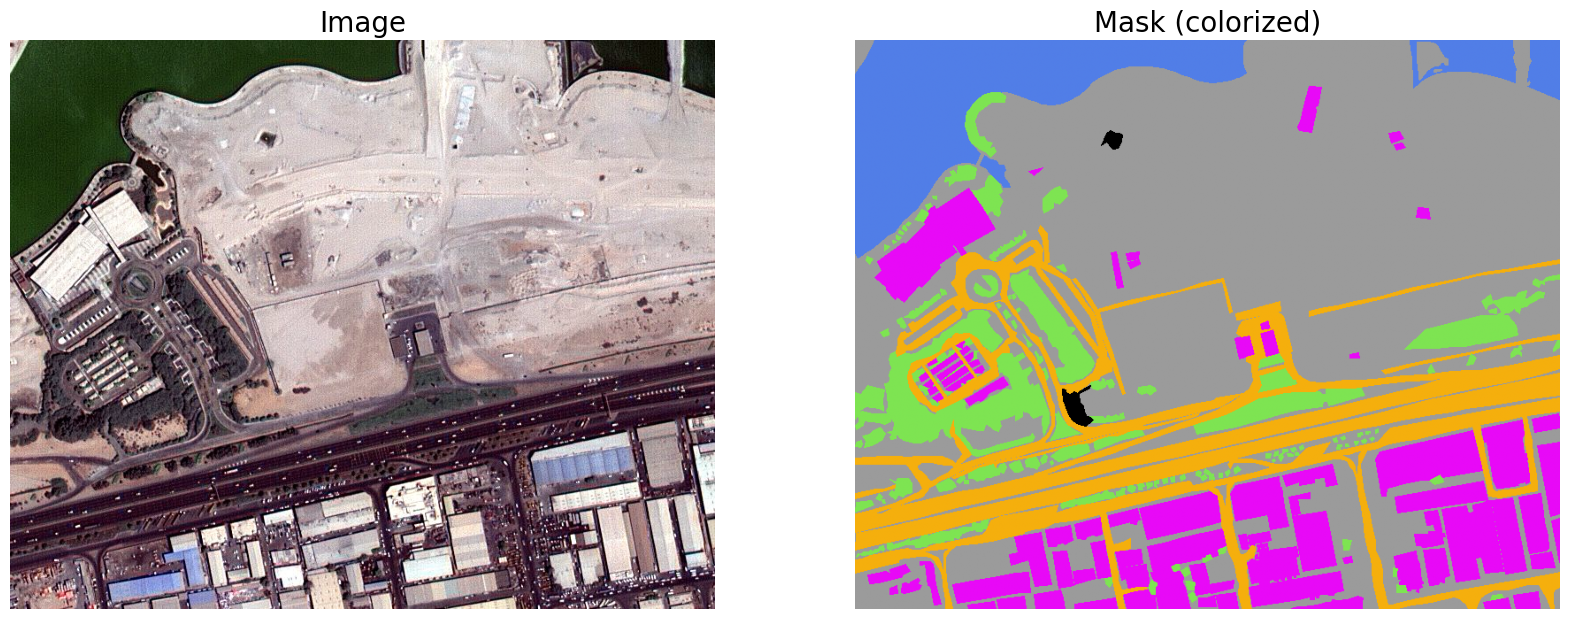

In [ ]:
# Selects a specific image: shows it and the respective label image

image_index = 7

print('\nPlotting images...')
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow( all_images[image_index] )
ax1.set_title('Image', fontsize=20)
ax1.axis('off')

mask = np.zeros((all_images[image_index].shape[0],all_images[image_index].shape[1]), dtype="uint8")
for annotation in classes['annotations']:
    mask = mask + ( ( all_masks[image_index] == annotation['gray'] ) * annotation['id'] )

ax2.imshow( labelVisualize(classes, 'id', mask ) )
ax2.set_title('Mask (colorized)', fontsize=20)
ax2.axis('off')

mask = []


Plotting images...


(-0.5, 255.5, 255.5, -0.5)

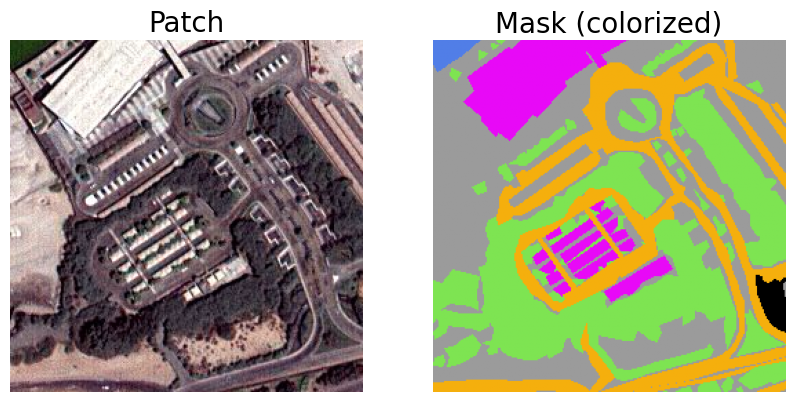

In [ ]:
# Selects a specific patch: shows it and the respective label image

image_index = 45

print('\nPlotting images...')
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 10))

ax1.imshow( x_patches[image_index] )
ax1.set_title('Patch', fontsize=20)
ax1.axis('off')

ax2.imshow( labelVisualize(classes, 'id', y_patches[image_index] ) )
ax2.set_title('Mask (colorized)', fontsize=20)
ax2.axis('off')


In [ ]:
# Transform y_patches shape (N, H, W) into shape (N, H, W, C)
# This is because the data agumentation procedure requires an image to have three dimensions

print(y_patches.shape)
y_patches = np.expand_dims(y_patches, 3)
print(y_patches.shape)


(1476, 256, 256)
(1476, 256, 256, 1)


## 5. Splitting the Dataset for Training and Validation

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a valid (test) set X_valid, Y_valid.


#### 5.1 A basic form, without libraries

In [ ]:
# Defining the percentage of the training set to be used as validation
valid_percent = 0.25

# Calculating the boundary (index) between training set and validation.
# The premise is always that X and Y have the same number of elements.
limit = len(x_patches) - int( len(x_patches)*valid_percent )

# Training set
x_train = x_patches[:limit]
y_train = y_patches[:limit]

# Validation set
x_valid = x_patches[limit:]
y_valid = y_patches[limit:]

print( "Number of patches/samples in the training set: %d " % ( len(x_train) ) )
print( "Number of patches/samples in the validation set: %d " % ( len(x_valid) ) )

Number of patches/samples in the training set: 1107 
Number of patches/samples in the validation set: 369 


#### 5.2 A basic form, separating sets at random

In [ ]:
# Defining the percentage of the training set to be used as validation
valid_percent = 0.25

# Calculating the boundary (index) between training set and validation.
# The premise is always that X and Y have the same number of elements.
limit = len(x_patches) - int( len(x_patches)*valid_percent )

# Building a list of indexes from 0 to N, where N corresponds to the number of images (patches).
indexes = [i for i in range(x_patches.shape[0])]

# Generating randomness in the list
import random
random.shuffle(indexes)

# Indexes of the images that will be used for training
indexes_for_train = indexes[:limit]
# ndexes of the images that will be used for validation
indexes_for_valid = indexes[limit:]

# Training set
x_train = x_patches[indexes_for_train]
y_train = y_patches[indexes_for_train]

# Validation set
x_valid = x_patches[indexes_for_valid]
y_valid = y_patches[indexes_for_valid]

'''
The above way work because X_PATCHES and Y_PATCHES are objects of the numpy.ndarray class.
Then, it is possible to use extended slicing.

In the case of lists, you would need to convert numpy.asarray () or
make the item-to-item assignment, such as:
x_train = [ x_patches[i] for i in indexes_for_train ]
'''

print( "Number of patches/samples in the training set: %d " % ( len(x_train) ) )
print( "Number of patches/samples in the validation set: %d " % ( len(x_valid) ) )

Number of patches/samples in the training set: 1107 
Number of patches/samples in the validation set: 369 


#### 5.3 With package scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the percentage of the training set to be used as validation
valid_percent = 0.25

(x_train, x_valid, y_train, y_valid) = train_test_split(x_patches, y_patches, test_size=valid_percent, random_state=1)

print( "Number of patches/samples in the training set: %d " % ( len(x_train) ) )
print( "Number of patches/samples in the validation set: %d " % ( len(x_valid) ) )

Number of patches/samples in the training set: 1107 
Number of patches/samples in the validation set: 369 


#### 5.4 Freeing up memory

In [ ]:
# Freeing up memory

all_images = 0
all_masks = 0
x_patches = 0
y_patches = 0

## 6. Data Augmentation

#### 6.1 Defining the parameters of the image generator


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Only rotations by 90 degrees
def orthogonal_rot(image):
    return np.rot90(image, np.random.choice([-1, 0, 1]))

# Tranformations for image patches
datagen_args = dict(
        preprocessing_function=orthogonal_rot,
        horizontal_flip=True, # horizontal flip
        vertical_flip=True, # vertical flip
        fill_mode='constant',
        cval=0
)

# Its necessary to provide the same seed and kwargs to the flow method
seed = 1
x_datagen = ImageDataGenerator(**datagen_args)
y_datagen = ImageDataGenerator(**datagen_args)


In [ ]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])


#### 6.2 Showing the results for specific patches/samples



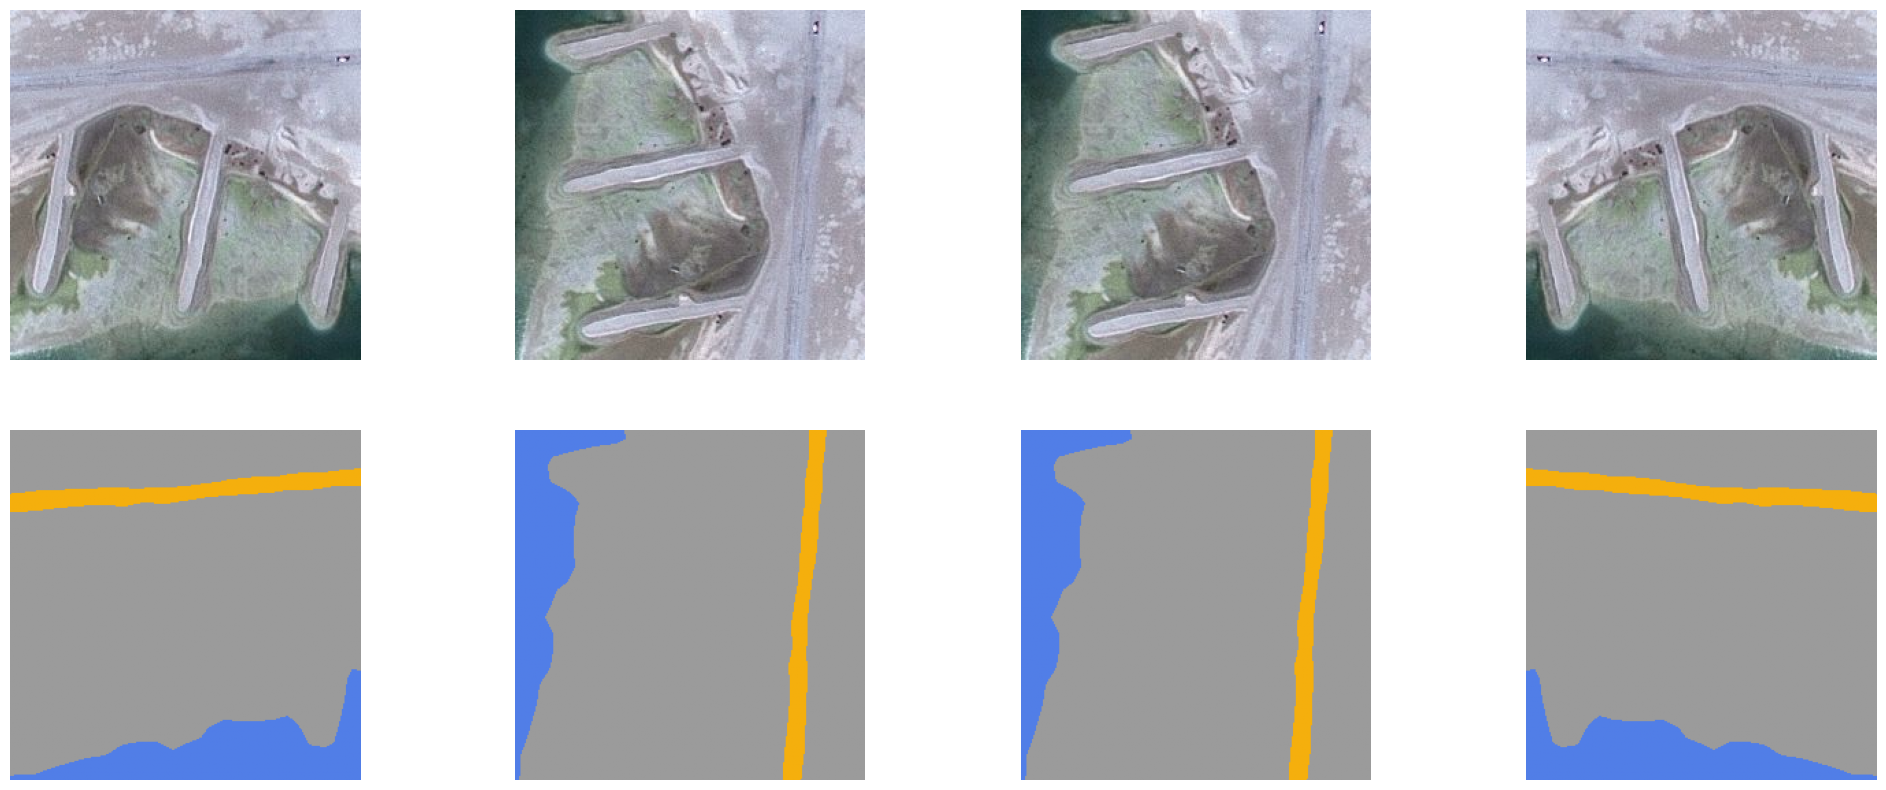

In [ ]:
# Selects a particular patch

show_index = 20

# Must expand image dimension (inser a first axis), because the flow method expects a batch of images.
x_sample = np.expand_dims( x_train[show_index], 0 )
y_sample = np.expand_dims( y_train[show_index], 0 )

x_iterator = x_datagen.flow(x_sample, seed=seed)
y_iterator = y_datagen.flow(y_sample, seed=seed)

nrows = 2
ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25,10))

for j in range(ncols):
    my_iterator = next( zip( x_iterator, y_iterator ) )

    ax[0][j].axis('off')
    ax[0][j].imshow(my_iterator[0][0])
    ax[1][j].axis('off')
    ax[1][j].imshow( labelVisualize(classes, 'id', my_iterator[1][0]) )


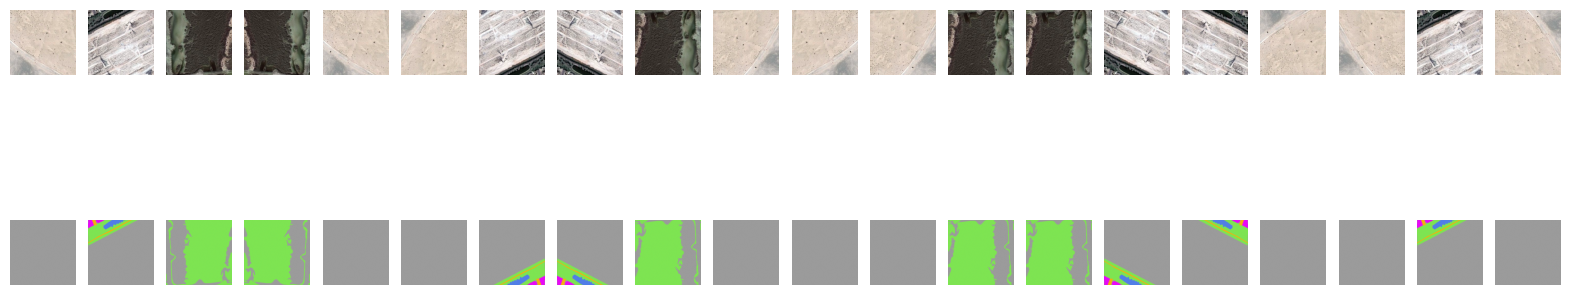

In [ ]:
# Shows the effect on some number of patches

numberOfSamples = 3

x_samples = x_train[0:numberOfSamples]
y_samples = y_train[0:numberOfSamples]

x_iterator = x_datagen.flow(x_samples, seed=seed)
y_iterator = y_datagen.flow(y_samples, seed=seed)

nrows = 2
ncols = 20
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,5))

for j in range(ncols):
    my_iterator = next( zip( x_iterator, y_iterator ) )

    ax[0][j].axis('off')
    ax[0][j].imshow(my_iterator[0][0])
    ax[1][j].axis('off')
    ax[1][j].imshow( labelVisualize(classes, 'id', my_iterator[1][0]) )


## 7. U-Net Implementation

The U-net architecture is as shown below. It consists of contraction path (encoder step) and expansion path (decoder step).

At contraction path, block convolution are formed by two times of 3×3 Conv and 2×2 max pooling. This encoder step can help to extract more advanced features, but it also reduce the size of feature maps.

At expansion path, consecutive of 2×2 Up-conv and two times of 3×3 Conv are done to recover the size of segmentation map. However, the above process reduces the “where” though it increases the “what”. That means, we can get advanced features, but we also loss the localization information.

Thus, after each up-conv, we also have concatenation of feature maps (gray arrows) that are with the same level. This helps to give the localization information from contraction path to expansion path.

At the end, 1×1 conv to map the feature map size from 64 to "N", where "N" is the number of classes.

References:
* https://towardsdatascience.com/review-u-net-biomedical-image-segmentation-d02bf06ca760
* https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5


<figure>
    <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*f7YOaE4TWubwaFF7Z1fzNw.png" alt="U-Net Architecture" >
    <figcaption>U-Net Architecture.
</figure>

In [ ]:
# Import libraries
from tensorflow.keras.layers import Input, Activation, Dense, Conv2D, MaxPool2D, Dropout, concatenate, UpSampling2D, Flatten, Conv2DTranspose
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score


In [ ]:
def conv_block(input, neurons, quantity, activation="relu", pooling=(2,2), drop=0.5):
  _conv = Conv2D(neurons * quantity, (3,3), activation=activation, padding="same")(input)
  _conv =  Conv2D(neurons * quantity, (3,3), activation=activation, padding="same")(_conv)
  _pool = MaxPool2D(pooling)(_conv)
  _pool = Dropout(drop)(_pool)
  return _pool, _conv


def deconv_block(input, conv, neurons, quantity, activation="relu", pooling=(2,2), drop=0.5):
  _deconv = Conv2DTranspose(neurons * quantity, (3, 3), strides=(2, 2), padding="same")(input)
  _uconv = concatenate([_deconv, conv])
  _uconv = Dropout(0.5)(_uconv)
  _uconv = Conv2D(neurons * quantity, (3, 3), activation="relu", padding="same")(_uconv)
  _uconv = Conv2D(neurons * quantity, (3, 3), activation="relu", padding="same")(_uconv)
  return _uconv

def unet(input_shape, n_classes):
# U-Net architecture
  global data_augmentation
  neurons = 64
  input_img = Input(input_shape)
  input_img = data_augmentation(input_img)
  block1, conv1 = conv_block(input_img, neurons, 1, drop=0.25)
  block2, conv2 = conv_block(block1, neurons, quantity=2)
  block3, conv3 = conv_block(block2, neurons, quantity=4)
  block4, conv4 = conv_block(block3, neurons, quantity=8)
  # middle
  convm = Conv2D(neurons * 16, (3,3), activation="relu", padding="same")(block4)
  convm = Conv2D(neurons * 16, (3,3), activation="relu", padding="same")(convm)
  # convT
  deconv1 = deconv_block(convm, conv4, neurons, quantity=8)
  deconv2 = deconv_block(deconv1, conv3, neurons, quantity=4)
  deconv3 = deconv_block(deconv2, conv2, neurons,quantity=2)
  deconv4 = deconv_block(deconv3, conv1, neurons, quantity=1, drop=0.25)

  output = Conv2D(n_classes,(1,1), activation = 'softmax')(deconv4)
  return Model(inputs = input_img, outputs = output, name='U-Net')


In [ ]:
# Building the model
model = unet(input_shape, number_of_classes)
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_95 (Conv2D)             (None, 256, 256, 64  1792        ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_96 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_95[1][0]']              
                                )                                                             

## 8. Training

In [ ]:
# Functions for training

def set_number_of_batches(qt_train_samples, qt_valid_samples, batch_size, data_augmentation, number_samples_for_generator=4):
    if data_augmentation:
        train_batchs_qtd = qt_train_samples//number_samples_for_generator
        valid_batchs_qtd = qt_valid_samples//number_samples_for_generator
    else:
        train_batchs_qtd = qt_train_samples//batch_size
        valid_batchs_qtd = qt_valid_samples//batch_size

    return train_batchs_qtd, valid_batchs_qtd

def get_batch_samples(x, y, batch, batch_size, data_augmentation, number_samples_for_generator):

    if data_augmentation:
        x_batch = x[batch * number_samples_for_generator : (batch + 1) * number_samples_for_generator, : , : , :]
        y_batch = y[batch * number_samples_for_generator : (batch + 1) * number_samples_for_generator, : , : , :]

        x_iterator = x_datagen.flow(x_batch, seed=batch)
        y_iterator = y_datagen.flow(y_batch, seed=batch)

        x_batch = np.array([next(x_iterator)[0] for _ in range(batch_size)])
        y_batch = np.array([next(y_iterator)[0] for _ in range(batch_size)])
    else:
        x_batch = x[batch * batch_size : (batch + 1) * batch_size, : , : , :]
        y_batch = y[batch * batch_size : (batch + 1) * batch_size, : , : , :]

    return x_batch, y_batch

def train_unet(net, x_train, y_train, x_valid, y_valid, batch_size, epochs, early_stopping_epochs, early_stopping_delta, filepath, filename, data_augmentation=False, number_samples_for_generator=1):
    print('Start the training...')

    # calculating number of batches
    train_batchs_qtd, valid_batchs_qtd = set_number_of_batches(x_train.shape[0], x_valid.shape[0], batch_size, data_augmentation, number_samples_for_generator)

    history_train = []
    history_valid = []
    valid_loss_best_model = float('inf')
    no_improvement_count = 0

    for epoch in range(epochs):
        print('Start epoch ... %d ' %(epoch) )
        # shuffle train set
        x_train, y_train = shuffle(x_train , y_train)

        # TRAINING
        train_loss = np.zeros((1 , 2))
        # mini batches strategy
        for  batch in range(train_batchs_qtd):
            print('Start batch ... %d ' %(batch) )
            x_train_batch, y_train_batch = get_batch_samples(x_train, y_train, batch, batch_size, data_augmentation, number_samples_for_generator)
            train_loss = train_loss + net.train_on_batch(x_train_batch, y_train_batch)

        # Estimating the loss in the training set
        train_loss = train_loss/train_batchs_qtd

        # VALIDATING
        valid_loss = np.zeros((1 , 2))
        # Evaluating the network (model) with the validation set
        for  batch in range(valid_batchs_qtd):
            x_valid_batch, y_valid_batch = get_batch_samples(x_valid, y_valid, batch, batch_size, data_augmentation, number_samples_for_generator)
            valid_loss = valid_loss + net.test_on_batch(x_valid_batch, y_valid_batch)

        # Estimating the loss in the validation set
        valid_loss = valid_loss/valid_batchs_qtd

        # Showing the results
        print("%d [Training loss: %f , Train acc.: %.2f%%][Validation loss: %f , Validation acc.:%.2f%%]" %(epoch , train_loss[0 , 0], 100*train_loss[0 , 1] , valid_loss[0 , 0] , 100 * valid_loss[0 , 1]))
        history_train.append( train_loss )
        history_valid.append( valid_loss )

        # Early Stopping
        if (1-(valid_loss[0 , 0]/valid_loss_best_model)) < early_stopping_delta:
            if no_improvement_count+1 >= early_stopping_epochs:
                print('Early Stopping reached')
                break
            else:
                no_improvement_count = no_improvement_count+1
        else:
            valid_loss_best_model = valid_loss[0 , 0]
            no_improvement_count = 0

            # Saving best model
            print("Saving the model...")
            net.save(filepath+filename+'.h5')

    return [ history_train, history_valid ]


### 8.1. Setting the hyperparameter values

In [ ]:
batch_size = 16
epochs = 10

# Fixed class weights
weights = [1, 1, 1, 1, 1, 1]

# Early Stop parameters
early_stopping_epochs = 20
early_stopping_delta = 0.0001 # delta improvement equivalent to 0.0001%

# Data augmentation parameters
data_augmentation = True
number_samples_for_generator = 4

# Optimizer
adam = Adam(learning_rate = 0.0005, beta_1=0.9)


### 8.2. Training

In [ ]:
# Compile the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer=adam , metrics=['accuracy'], loss_weights=weights)

filename = 'modelo_unet'

# Start training
#history = train_unet(model, x_train, y_train, x_valid, y_valid, batch_size, epochs, early_stopping_epochs, early_stopping_delta, root_path, filename, data_augmentation, number_samples_for_generator)

# Should run the line above, but to speed up training during preliminary experiments you may train with only 10% of (shuffled) training data
x_train, y_train = shuffle(x_train , y_train)
x_valid, y_valid = shuffle(x_valid , y_valid)
num_train = x_train.shape[0]//10
num_valid = x_valid.shape[0]//10
history = train_unet(model, x_train[0:num_train], y_train[0:num_train], x_valid[0:num_valid], y_valid[0:num_valid], batch_size, epochs, early_stopping_epochs, early_stopping_delta, root_path, filename, data_augmentation, number_samples_for_generator)


Start the training...
Start epoch ... 0 
Start batch ... 0 
Start batch ... 1 
Start batch ... 2 
Start batch ... 3 
Start batch ... 4 
Start batch ... 5 
Start batch ... 6 
Start batch ... 7 
Start batch ... 8 
Start batch ... 9 
Start batch ... 10 
Start batch ... 11 
Start batch ... 12 
Start batch ... 13 
Start batch ... 14 
Start batch ... 15 
Start batch ... 16 
Start batch ... 17 
Start batch ... 18 
Start batch ... 19 
Start batch ... 20 
Start batch ... 21 
Start batch ... 22 
Start batch ... 23 
Start batch ... 24 
Start batch ... 25 
Start batch ... 26 
0 [Training loss: 1.545313 , Train acc.: 52.15%][Validation loss: 1.136450 , Validation acc.:56.91%]
Saving the model...
Start epoch ... 1 
Start batch ... 0 
Start batch ... 1 
Start batch ... 2 
Start batch ... 3 
Start batch ... 4 
Start batch ... 5 
Start batch ... 6 
Start batch ... 7 
Start batch ... 8 
Start batch ... 9 
Start batch ... 10 
Start batch ... 11 
Start batch ... 12 
Start batch ... 13 
Start batch ... 14 

### 8.3. Training history graph

In [ ]:
def show_graph_loss_accuracy(history,accuracy_position):
    plt.rcParams['axes.facecolor']='white'
    plt.figure(num=1, figsize=(14,6))

    config = [ { 'title': 'model accuracy', 'ylabel': 'accuracy', 'legend_position': 'upper left', 'index_position': accuracy_position },
               { 'title': 'model loss', 'ylabel': 'loss', 'legend_position': 'upper right', 'index_position': 0 } ]

    for i in range(len(config)):

        plot_number = 120 + (i+1)
        plt.subplot(plot_number)
        plt.plot(history[0,:,0,config[i]['index_position']])
        plt.plot(history[1,:,0,config[i]['index_position']])
        plt.title(config[i]['title'])
        plt.ylabel(config[i]['ylabel'])
        plt.xlabel('epoch')
        plt.legend(['train', 'valid'], loc=config[i]['legend_position'])
        plt.tight_layout()

    plt.show()

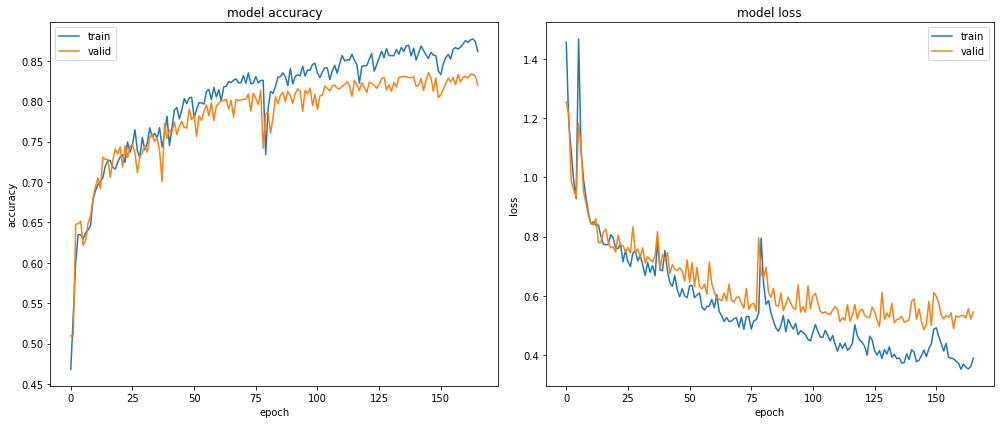

In [ ]:
show_graph_loss_accuracy(np.asarray(history),1)

## 9. Testing


#### 9.1. Testing the model (on training data)


In [ ]:
# Function to evaluate the model
def Test(model, patch_test):
    result = model.predict(patch_test)
    predicted_class = np.argmax(result, axis=-1)
    return predicted_class

# Function to compute accuracy metrics
def compute_metrics(true_labels, predicted_labels):
    accuracy = 100*accuracy_score(true_labels, predicted_labels)
    f1score = 100*f1_score(true_labels, predicted_labels, average=None)
    recall = 100*recall_score(true_labels, predicted_labels, average=None)
    precision = 100*precision_score(true_labels, predicted_labels, average=None)
    return accuracy, f1score, recall, precision

In [ ]:
# Load the best model (file type .h5)
filename = 'modelo_unet'
model = load_model(root_path + filename + '.h5', compile=False)

In [ ]:
# Test the model using some of the training data
pred_train = Test(model, x_train[0:40])

In [ ]:
# Show the prediction of a specific training patch (3, 4, 5, 7)
index = 7

print('\nPlotting images...')
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(x_train[index])
ax1.set_title('Patch', fontsize=20)
ax1.axis('off')

ax2.imshow( labelVisualize( classes, 'id', y_train[index][:,:,0] ) )
ax2.set_title('Mask', fontsize=20)
ax2.axis('off')

ax3.imshow( labelVisualize( classes, 'id', pred_train[index] ) )
ax3.set_title('Predict', fontsize=20)
ax3.axis('off')


In [ ]:
# Turn labels into unidimensional vectors for accuracy assessment
true_labels = np.reshape(y_train[0:40], (y_train[0:40].shape[0]* y_train[0:40].shape[1]*y_train[0:40].shape[2]))
predicted_labels = np.reshape(pred_train, (pred_train.shape[0]* pred_train.shape[1]*pred_train.shape[2]))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print('Confusion  matrix')
print('=================')
print(cm)

# Metrics
metrics = compute_metrics(true_labels, predicted_labels)
print('\nMetrics')
print('=======')
print('Accuracy: ', metrics[0])
print('F1score: ', metrics[1])
print('Recall: ', metrics[2])
print('Precision: ', metrics[3])

#### 9.2. Testing the model (on test data)

In [ ]:
# Load the best model (file type .h5)
filename = 'modelo_unet'
model = load_model(root_path + filename + '.h5', compile=False)

In [ ]:
# Loading all existing images in Test Folders
all_images, all_masks = loadImages(dataset_path, evaluate_folders, True)

# Extract test patches
x_test, y_test = extract_patches_from_list( all_images, all_masks, patch_size, stride)

tmp = np.zeros((y_test.shape[0],) + (256,256), dtype="uint8")
for annotation in classes['annotations']:
    tmp = tmp + ( ( y_test == annotation['gray'] ) * annotation['id'] )
y_test = tmp

tmp = []
all_images = []
all_masks = []

print( "Total of test patches/samples: %d of shape %s " % ( x_test.shape[0], y_test.shape[1:] ) )

Total of test patches/samples: 36 of shape (256, 256) 


In [ ]:
# Test the model
pred_test_unet = Test(model, x_test)
print(pred_test_unet.shape)



Plotting images...


(-0.5, 255.5, 255.5, -0.5)

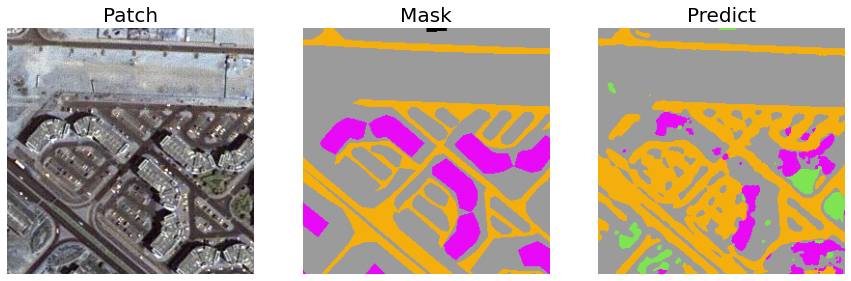

In [ ]:
# Show the predictions on an arbitrary patch

index = 7

print('\nPlotting images...')
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(x_test[index])
ax1.set_title('Patch', fontsize=20)
ax1.axis('off')

ax2.imshow( labelVisualize( classes, 'id', y_test[index][:,:] ) )
ax2.set_title('Mask', fontsize=20)
ax2.axis('off')

ax3.imshow( labelVisualize( classes, 'id', pred_test_unet[index] ) )
ax3.set_title('Predict', fontsize=20)
ax3.axis('off')


In [ ]:
true_labels = np.reshape(y_test, (y_test.shape[0]* y_test.shape[1]*y_test.shape[2]))
predicted_labels = np.reshape(pred_test_unet, (pred_test_unet.shape[0]* pred_test_unet.shape[1]*pred_test_unet.shape[2]))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print('Confusion  matrix')
print('=================')
print(cm)

# Metrics
metrics = compute_metrics(true_labels, predicted_labels)
print('\nMetrics')
print('=======')
print('Accuracy: ', metrics[0])
print('F1score: ', metrics[1])
print('Recall: ', metrics[2])
print('Precision: ', metrics[3])

Confusion  matrix
[[      0   20785   15817     207       0    6231]
 [      0 1169634  176208   58962    3251   35979]
 [      0   32505  269842     805     649    6987]
 [      0   17764   27177   26828   53417     283]
 [      0    2924     119     372  151825       0]
 [      0  162676   15596    4531     161   97761]]

Metrics
Accuracy:  72.72889879014757
F1score:  [ 0.         82.07030644 66.17448167 24.70645657 83.29607207 45.68633957]
Recall:  [ 0.         80.99767734 86.82510264 21.38217408 97.80018037 34.82447235]
Precision:  [ 0.         83.17172585 53.4595718  29.25467532 72.53837738 66.39522959]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
